In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
#Importing the dataset
df = pd.read_csv('D:\\New folder\\ML\\Completed\\AirBnb.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-10,146.000000,165.000000,141.250000,144.710007,144.710007,70447500
1,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
2,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
3,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
4,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
5,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700
6,2020-12-18,150.449997,159.000000,150.300003,157.300003,157.300003,15954200
7,2020-12-21,155.309998,172.000000,145.110001,163.020004,163.020004,17788100
8,2020-12-22,170.000000,174.970001,161.050003,163.190002,163.190002,9872600
9,2020-12-23,162.813995,168.250000,155.500000,158.009995,158.009995,5852500


In [3]:
#Checking for null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
#Checking for duplicates
df.duplicated().sum()

0

In [5]:
df.shape

(777, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       777 non-null    object 
 1   Open       777 non-null    float64
 2   High       777 non-null    float64
 3   Low        777 non-null    float64
 4   Close      777 non-null    float64
 5   Adj Close  777 non-null    float64
 6   Volume     777 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 42.6+ KB


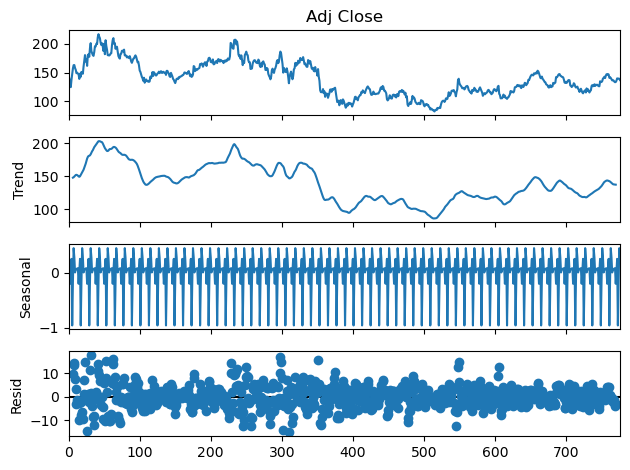

In [7]:
result = sm.tsa.seasonal_decompose(df['Adj Close'],period=12)
result.plot()
plt.show()

In [8]:
import numpy as np
import statsmodels.api as sm

# Assuming 'df' is your DataFrame with a datetime index and 'Adj Close' is the time series data
acf_result = sm.tsa.acf(df['Adj Close'], fft=True)
seasonal_period = np.argmax(acf_result[1:]) + 1

print(f'Estimated Seasonal Period: {seasonal_period}')

Estimated Seasonal Period: 1


In [9]:
#Creating the exponential smoothing model
model = ExponentialSmoothing(df['Adj Close'], trend='multiplicative', seasonal='multiplicative', seasonal_periods=12)
model

In [10]:
model_fit = model.fit()

C:\Users\User\anaconda3\envs\Research\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [11]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(df['Adj Close'], train_size=0.8)

In [12]:
#Making predcitions to check the model accuracy
forecast = model.predict(start=0, end=len(train_data)+len(test_data)-1,params=model_fit.params)
forecast

array([144.67802079, 144.64075776, 138.74344863, 130.19344898,
       125.07550649, 136.97078307, 147.74933263, 157.73617605,
       162.45406732, 162.89072262, 157.91340269, 154.74857238,
       148.87791166, 149.91798886, 147.85060728, 146.93659406,
       139.47413007, 147.25111038, 143.5820386 , 151.70327809,
       149.31274315, 147.87536611, 160.53588782, 169.77063213,
       180.18831792, 169.29038832, 172.95527797, 162.07296316,
       180.55652273, 180.67093822, 178.51741181, 193.25054711,
       200.53757623, 187.15642098, 183.49778361, 180.32855148,
       178.96953217, 185.56904254, 194.92262538, 195.47575228,
       200.74662207, 198.58338989, 212.68081227, 217.52442118,
       212.04957051, 209.50470736, 201.84858491, 197.92191548,
       200.80402237, 195.29781881, 186.9109886 , 200.25029012,
       182.5583933 , 204.7842018 , 197.55831964, 190.60440285,
       179.92168022, 179.90448533, 179.6494743 , 180.65934268,
       182.87144696, 183.6940606 , 196.94814987, 206.82

In [13]:
# Calculating mean absolute error (MAE)
mae = mean_absolute_error(df['Adj Close'], forecast)

# Calculating mean squared error (MSE)
mse = mean_squared_error(df['Adj Close'], forecast)

# Calculating root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calculating mean absolute percentage error (MAPE)
mape = np.mean(np.abs((df['Adj Close'] - forecast) / df['Adj Close'])) * 100

# Printing the computed metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)

MAE: 3.4363397966945053
MSE: 22.70475867154553
RMSE: 4.764951067067272
MAPE: 2.459364844320184


In [15]:
#Making predictions from the ES model for the next 8 years
start_date = '2024'
end_date = '2030'
#date_range = pd.date_range(start=start_date, end=end_date, freq='Q')
date_range = pd.date_range(start=start_date, end=end_date, freq='Y')
forecast_mod = model.predict(start=len(train_data)+len(test_data), end=len(train_data)+len(test_data)+len(date_range)-1,params=model_fit.params)
#forecast_index = pd.DatetimeIndex(date_range)
#forecast_df = pd.DataFrame(forecast_mod, index=forecast_index, columns=df['Adj Close'])
#forecast_df

In [16]:
forecast_mod

array([136.91075637, 136.78850439, 136.68233898, 136.52163727,
       136.45598771, 135.91126829])